## <b>Name: </b> Vinayak Tripathi
## <b>UID: </b> 2019110067
## <b>Batch </b> A
## <b>Class </b> Data Anayltics Lab

In [56]:
%matplotlib inline
import pandas as pd
import numpy as np
import statistics
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
import scipy.stats
import statsmodels.api as sm
#import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from statsmodels.stats.stattools import jarque_bera

cpga-iq-placement



In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cpga-iq-placement/student_clustering.csv


In [17]:
from statsmodels.stats.weightstats import ztest as ztest
import statistics

data = pd.read_csv("/kaggle/input/cpga-iq-placement/student_clustering.csv")

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='iq', ylabel='Density'>

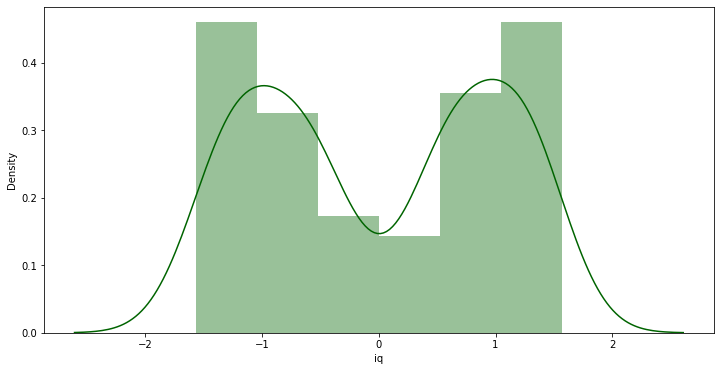

In [15]:
plt.figure(figsize = (12,6))
sns.distplot(df.iq,color = 'darkgreen')

In [16]:
data.describe()

,cgpa,iq
count,200.000000,200.000000
mean,6.983400,101.995000
std,1.624101,12.161599
min,4.600000,83.000000
25%,5.407500,91.000000
50%,7.040000,102.000000
75%,8.585000,113.000000
max,9.300000,121.000000


In [21]:
mean = data.describe().loc['mean','iq']
standard_deviation = data.describe().loc['std','iq']

tstat,pvalue = ztest(data.iq, value = 100)
print("The test Statistics is",tstat,"\nThe pvalue is",pvalue)

The test Statistics is 2.3198890111238506 
The pvalue is 0.02034688218684213


In [14]:
df = data.select_dtypes(include='number').apply(stats.zscore)
df.head()

,cgpa,iq
0,-1.144049,-1.153641
1,-0.668751,0.907168
2,0.849734,-0.741479
3,0.794180,-0.411750
4,-0.946522,0.659871


# Independent Z-Test
We will be trying to get the intituion wether the CGPA and IQ of students are similar to each other or not<br>
Null Hypothesis--> H<sub>0</sub>: The mean of the sample IQ is greater than or equal to population IQ<br>
Alternate Hypothesis--> H<sub>1</sub>: The mean of the sample IQ is leass than to population IQ

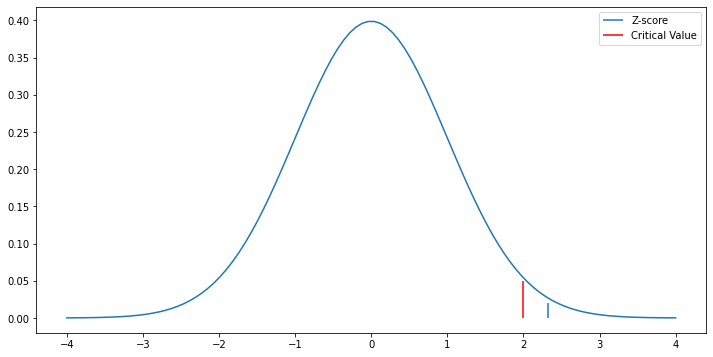

In [55]:
mu = 0 # mean
variance = 1 #variance
sigma = np.sqrt(variance) #standard deviation",
x = np.linspace(mu - 4 * variance, mu + 4 * variance, 100)
plt.figure(figsize = (12,6))
_ = plt.plot(x, scipy.stats.norm.pdf(x, mu, sigma))
plt.vlines(x = 2.3198890111238506,ymin=0,ymax=0.02034688218684213,label = 'Z-score')
plt.vlines(x = 2,ymin=0,ymax=0.05,color='r',label = "Critical Value")
plt.legend()
# plt.aline(y=0.05)

The Null hypothesis was that the mean of the IQ of college students is greater than equal the population mean IQ
The Alternative hypothesis was that the mean of IQ of college is less than the population mean IQ

From above analysis we can say that p value is less than 0.05. So the region lies in rejection zone. So we are able to reject the hypothesis that the IQ of college students is higher that population mean of 100 with the confidence of 95%

# Two Sample Z-Test
We will be trying to get the intituion wether the CGPA and IQ of students are similar to each other or not<br>
Null Hypothesis--> H<sub>0</sub>: The mean of the CGPA and IQ is same<br>
Alternate Hypothesis--> H<sub>1</sub>: The mean of the CGPA and IQ is not same

In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data['Scaled_IQ'] = scaler.fit_transform(data.iloc[:,[1]])
data['Scaled_cgpa'] = scaler.fit_transform(data.iloc[:,[0]])

In [53]:
data.describe()

,cgpa,iq,Scaled_IQ,Scaled_cgpa
count,200.000000,200.000000,2.000000e+02,2.000000e+02
mean,6.983400,101.995000,-3.863576e-16,-3.241851e-16
std,1.624101,12.161599,1.002509e+00,1.002509e+00
min,4.600000,83.000000,-1.565803e+00,-1.471202e+00
25%,5.407500,91.000000,-9.063439e-01,-9.727562e-01
50%,7.040000,102.000000,4.121618e-04,3.493750e-02
75%,8.585000,113.000000,9.071682e-01,9.886200e-01
max,9.300000,121.000000,1.566627e+00,1.429968e+00


In [54]:
tstat,pvalue = ztest(data.Scaled_IQ,data.Scaled_cgpa, value = 0)
print("The test Statistics is",tstat,"\nThe pvalue is",pvalue)

The test Statistics is -6.201686337928615e-16 
The pvalue is 0.9999999999999996


Since this p-value is close to 1, we have do not have sufficient evidence to reject the null hypothesis. In other words, the mean IQ level is significantly correlated with the CGPA of the students.